In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import seaborn as sns

In [2]:
# find the path on your disk
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Fall 2020\Data\exam_scores.csv"

In [3]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

### correlation matrix

In [4]:
df.corr()
# df.corr().round(2)

,math_score,reading_score,writing_score,study_hours
math_score,1.000000,0.857614,0.842227,0.661965
reading_score,0.857614,1.000000,0.957473,0.569435
writing_score,0.842227,0.957473,1.000000,0.578325
study_hours,0.661965,0.569435,0.578325,1.000000


### Correlation heatmap

<AxesSubplot:>

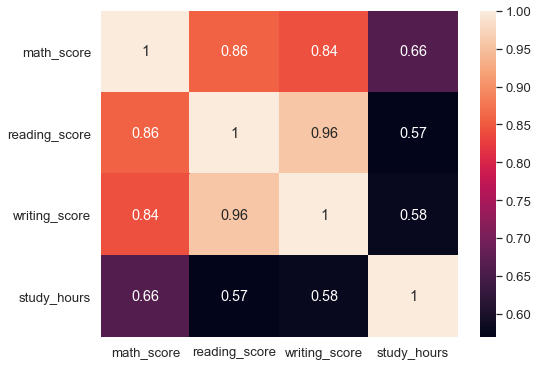

In [48]:
# set the style
sns.set_style("whitegrid")

# set the size
plt.figure(figsize=(8,6))

# plot
sns.heatmap(((df[['math_score','reading_score','writing_score','study_hours']]).corr()), annot=True)

### Calculate correlation coefficient

In [35]:
# stats.pearsonr(x, y)
stats.pearsonr(df['math_score'],df['study_hours'])

(0.6619650493998472, 6.435343932530891e-14)

### Scatter plot

<AxesSubplot:xlabel='math_score', ylabel='study_hours'>

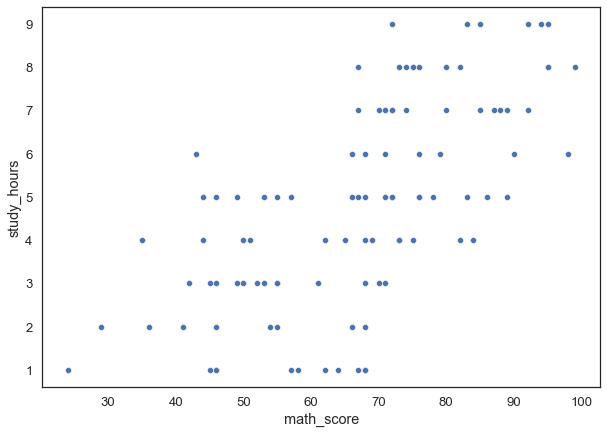

In [25]:
# set the style
sns.set_style("white")

# set the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.scatterplot(data=df, x='math_score', y="study_hours")

## Scatter plot with the best line

<AxesSubplot:xlabel='math_score', ylabel='study_hours'>

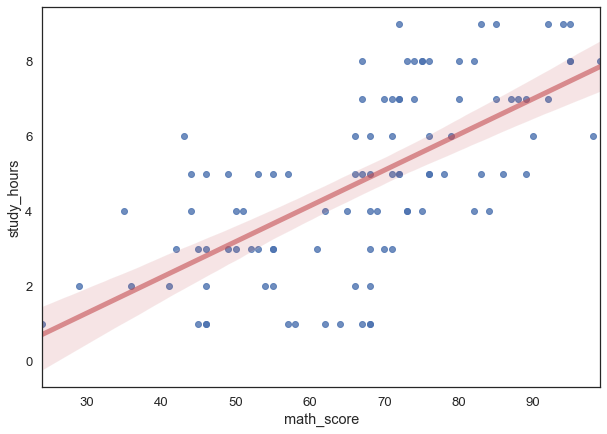

In [49]:
# set teh style
sns.set_style("white")

# seet the size
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

# plot
sns.regplot(x=df['math_score'], y=df['study_hours'], line_kws={"color":"r","alpha":0.6,"lw":5})

### Scatter plot with histograms

<Figure size 1008x1008 with 0 Axes>

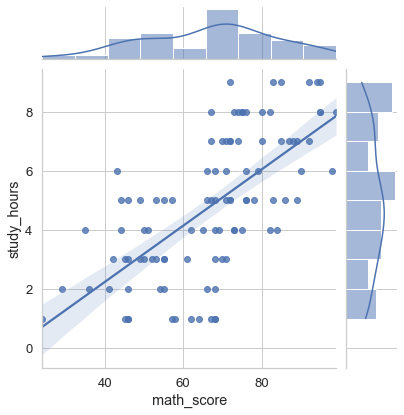

In [29]:
sns.set_style("whitegrid")

fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(14, 14)

sns.jointplot(data=df, x='math_score', y='study_hours', kind="reg")

# Regressions

In [43]:
independent_Var = df['study_hours']
dependent_var   = df['math_score']

independent_Var = sm.add_constant(independent_Var)

# Fit and summarize OLS model
linearModel = sm.OLS(dependent_var, independent_Var)
results = linearModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     76.44
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           6.44e-14
Time:                        18:57:20   Log-Likelihood:                -393.11
No. Observations:                 100   AIC:                             790.2
Df Residuals:                      98   BIC:                             795.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          44.8916      2.825     15.890      